In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
data = pd.read_csv('heart.csv',encoding ='latin-1')

FileNotFoundError: [Errno 2] File b'heart.csv' does not exist: b'heart.csv'

In [0]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [0]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [0]:
pd.crosstab(data.sex,data.target,margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


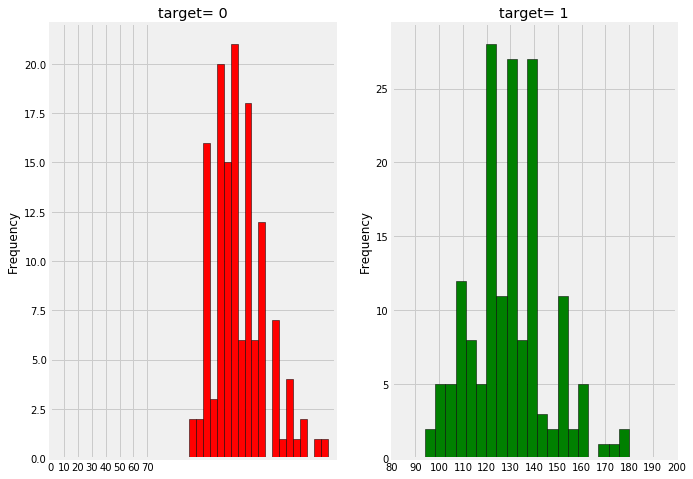

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8))

data[data['target']==0].trestbps.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('target= 0')
x1=list(range(0,80,10))
ax[0].set_xticks(x1)

data[data['target']==1].trestbps.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('target= 1')
x2=list(range(80,210,10))
ax[1].set_xticks(x2)

plt.show()

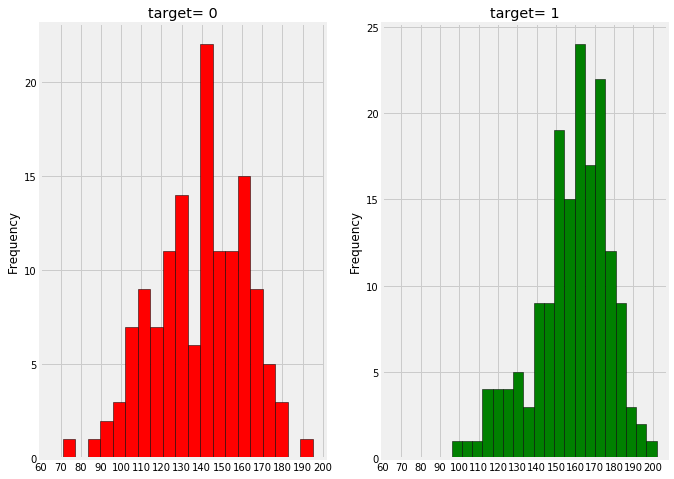

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8))

data[data['target']==0].thalach.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('target= 0')
x1=list(range(60,210,10))
ax[0].set_xticks(x1)

data[data['target']==1].thalach.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('target= 1')
x2=list(range(60,210,10))
ax[1].set_xticks(x2)

plt.show()

Text(0.5, 1.0, 'trestbps Distribution within target')

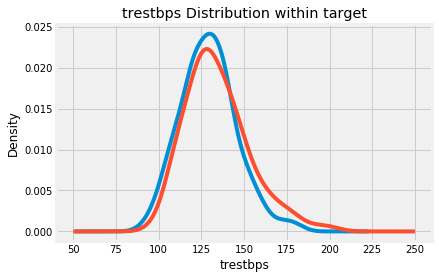

In [0]:
data.trestbps[data.target == 1].plot(kind='kde')    
data.trestbps[data.target == 0].plot(kind='kde')

plt.xlabel("trestbps")    
plt.title("trestbps Distribution within target")

In [0]:
data['thalach_groups']=0
data.loc[data['thalach']<=75,'thalach_groups']=0
data.loc[(data['thalach']>75)&(data['thalach']<=110),'thalach_groups']=1
data.loc[(data['thalach']>110)&(data['thalach']<=160),'thalach_groups']=2
data.loc[(data['thalach']>160)&(data['thalach']<=200),'thalach_groups']=3
data.loc[data['thalach']>200,'thalach_groups']=4
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_groups
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,3


In [0]:
data['chol_Range']=pd.qcut(data['chol'],4)
data.groupby(['chol_Range'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
chol_Range,
"(125.999, 211.0]",0.628205
"(211.0, 240.0]",0.594595
"(240.0, 274.5]",0.52
"(274.5, 564.0]",0.434211


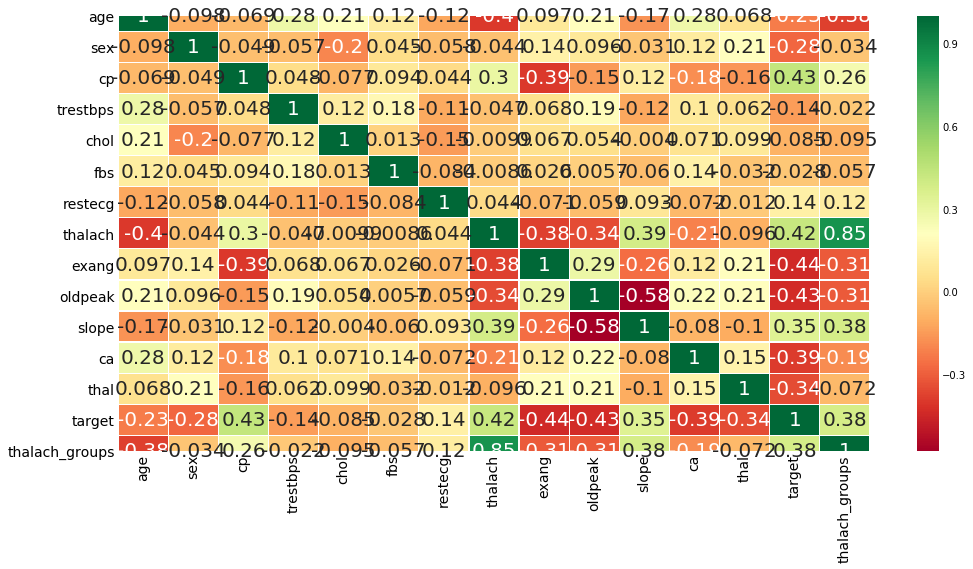

In [0]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [0]:
aux = data

aux.drop(['target'])

X = np.array(aux).astype(float)

KeyError: ignored

In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

MODELOS DE CLASIFICACION

In [0]:
train,test=train_test_split(data,test_size=0.3,random_state=37,stratify=data['target'])

In [0]:
train_X=train[train.columns[0:13]]
train_Y=train['target']

test_X=test[test.columns[0:13]]
test_Y=test['target']

In [0]:
model = LogisticRegression()

model.fit(train_X,train_Y)

prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.7802197802197802


In [0]:
model=DecisionTreeClassifier()

model.fit(train_X,train_Y)

prediction2=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction2,test_Y))

The accuracy of the Decision Tree is 0.7582417582417582


In [0]:
model=GaussianNB()

model.fit(train_X,train_Y)

prediction3=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the NaiveBayes is 0.7802197802197802


In [0]:
model1 = xg.XGBClassifier(n_estimators=100,learning_rate=0.1)

model1.fit(train_X,train_Y)

model1_pred = model1.predict(test_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model1_pred,test_Y))

model1_train_pred = model1.predict(train_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model1_train_pred,train_Y))

The accuracy of the Gradient Boosting is 0.7912087912087912
The accuracy of the Gradient Boosting is 0.9905660377358491


In [0]:
model2 = xg.XGBClassifier(n_estimators=400,learning_rate=0.1)

model2.fit(train_X,train_Y)

model2_pred = model2.predict(test_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model2_pred,test_Y))

The accuracy of the Gradient Boosting is 0.7912087912087912


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
model3 = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)

model3.fit(train_X,train_Y)

model3_pred = model3.predict(test_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model3_pred,test_Y))

model3_train_pred = model3.predict(train_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model3_train_pred,train_Y))

The accuracy of the Gradient Boosting is 0.7692307692307693
The accuracy of the Gradient Boosting is 1.0


In [0]:
kmeans = KMeans(n_clusters=3) 

kmeans_fitted = kmeans.fit(train_X)

In [0]:
train['Cluster_Kmeans'] = kmeans_fitted.predict(train_X)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_Kmeans
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1,4
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0,4
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,3


In [0]:
train_X['Cluster_Kmeans'] = kmeans_fitted.predict(train_X)
train_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster_Kmeans
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,4
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,4
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,3


In [0]:
test_X['Cluster_Kmeans'] = kmeans_fitted.predict(test_X)
test_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster_Kmeans
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,4
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,4
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,0


In [0]:
train.groupby(['Cluster_Kmeans','target'])['target'].count()

Cluster_Kmeans  target
0               0         29
                1         30
1               0          2
                1          2
2               0         18
                1         22
3               0         23
                1         12
4               0         25
                1         49
Name: target, dtype: int64

In [0]:
train.groupby(['Cluster_Kmeans'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
Cluster_Kmeans,
0,0.508475
1,0.5
2,0.55
3,0.342857
4,0.662162


In [0]:
model1 = xg.XGBClassifier(n_estimators=100,learning_rate=0.1)

model1.fit(train_X,train_Y)

model1_pred = model1.predict(test_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model1_pred,test_Y))

model1_train_pred = model1.predict(train_X)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(model1_train_pred,train_Y))

The accuracy of the Gradient Boosting is 0.7802197802197802
The accuracy of the Gradient Boosting is 0.9905660377358491


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Cluster_Kmeans'],
      dtype='object')
[0.02538783 0.05624262 0.25100228 0.03344719 0.02278356 0.01328837
 0.03059183 0.03115247 0.16276196 0.06423943 0.06373055 0.10677643
 0.11793289 0.02066251]


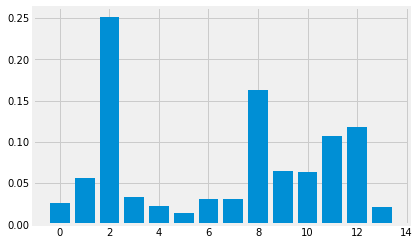

In [0]:
from matplotlib import pyplot

print(train_X.columns)
print(model1.feature_importances_)

pyplot.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
pyplot.show()